In [21]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as

In [42]:
rpkm_values = pd.read_table("../rpkm_counts.txt", sep="\t", skipfooter=5, engine='python')

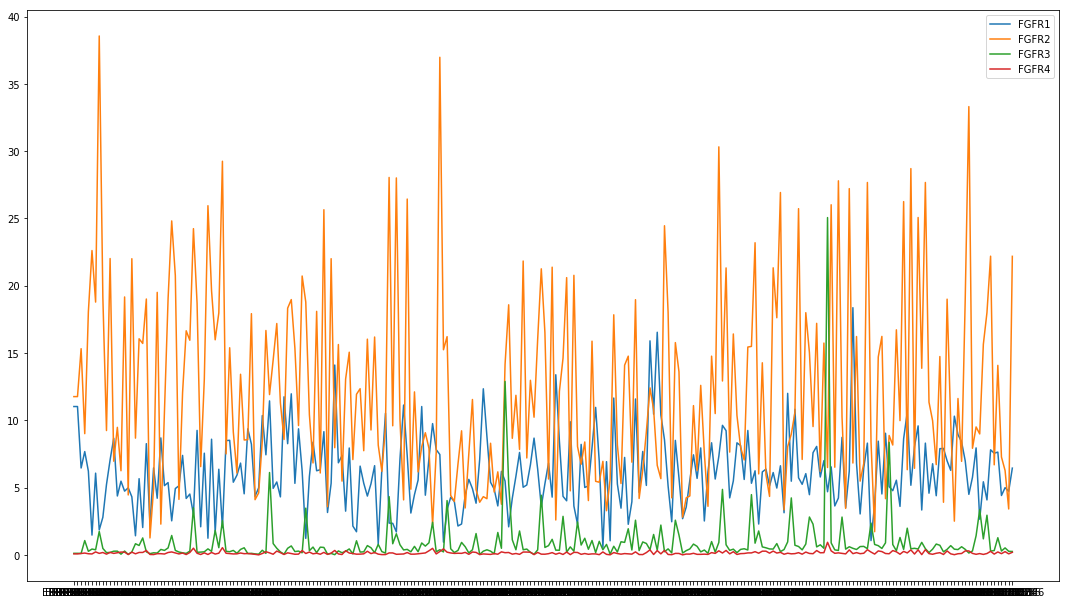

In [136]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.plot(rpkm_values.loc["FGFR1",:])
plt.plot(rpkm_values.loc["FGFR2",:])
plt.plot(rpkm_values.loc["FGFR3",:])
plt.plot(rpkm_values.loc["FGFR4",:])
plt.legend()

plt.show()

In [104]:
filtered_genes = ["TP53", "MDM2", "MDM4", "CDKN2A", "CDKN2B", "TP53BP1",
           "KRAS", "HRAS", "BRAF", "RAF1", "MAP3K1", "MAP3K2", "MAP3K3",
           "MAP3K4", "MAP3K5", "MAP2K1", "MAP2K2", "MAP2K3", "MAP2K4",
           "MAP2K5", "MAPK1", "MAPK3", "MAPK4", "MAPK6", "MAPK7", "MAPK8", 
           "MAPK9", "MAPK12", "MAPK14", "DAB2", "RASSF1", "RAB25", "PIK3CA", 
           "PIK3R1", "PIK3R2", "PTEN", "PDPK1", "AKT1", "AKT2", "FOXO1", 
           "FOXO3", "MTOR", "RICTOR", "TSC1", "TSC2", "RHEB", "AKT1S1", 
           "RPTOR", "MLST8", "FGF1", "FGF10-AS1", "FGF12", "FGF13",
           "FGF18", "FGF19", "FGF2", "FGF20", "FGF21", "FGF22", "FGF4",
           "FGF7", "FGF9", "FGFBP1", "FGFR1", "FGFR1OP", "FGFR1OP2", "FGFR2",
           "FGFR3", "FGFR4", "KLB"]

In [105]:
correlation_coef = pd.DataFrame(index=filtered_genes)
correlation_pval = pd.DataFrame(index=filtered_genes)

intrested_genes = ["FGF19", "FGF21",  "FGFR1",  "FGFR2",  "FGFR3", "FGFR4",  "KLB"]

for intrested_gene in intrested_genes:
    print("processing " + intrested_gene)
    
    correlation_coef[intrested_gene] = 0
    correlation_pval[intrested_gene] = 1
    
    genes_set = rpkm_values.index.tolist()
    for gene in filtered_genes:
        corr = scipy.stats.pearsonr(rpkm_values.loc[intrested_gene,:], rpkm_values.loc[gene,:])
        correlation_coef.loc[gene, intrested_gene] = corr[0]
        correlation_pval.loc[gene, intrested_gene] = corr[1]
        

processing FGF19
processing FGF21
processing FGFR1
processing FGFR2
processing FGFR3
processing FGFR4
processing KLB


In [ ]:
correlation_coef = {}
correlation_pval = {}
genes_set = rpkm_values.index.tolist()
for gene in genes_set:
    corr = scipy.stats.pearsonr(rpkm_values.loc[gene,:], rpkm_values.loc["FGFR2",:])
    correlation_coef[gene] = corr[0]
    correlation_pval[gene] = corr[1]
    
fgfr2_correlation = pd.DataFrame({"coef" : correlation_coef, 
                                  "pvalue" : correlation_pval})

In [89]:
fgfr2_correlated_genes = correlation_coef.loc[correlation_coef.FGFR2 < -0.5, "FGFR2"]

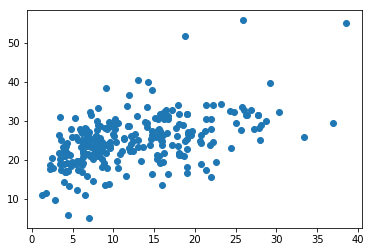

In [137]:
plt.scatter(rpkm_values.loc["FGFR2",:], rpkm_values.loc["RAF1",:])

In [90]:
fgfr2_correlated_genes

ABR      -0.553619
CKS2     -0.509945
LIMK1    -0.510174
NPC2     -0.515187
RENBP    -0.500389
RPS27L   -0.520584
SYTL1    -0.553169
TGFB1    -0.501714
Name: FGFR2, dtype: float64

In [101]:
all_genes = pd.Series(rpkm_values.index.tolist())

In [116]:
correlation_coef

,FGF19,FGF21,FGFR1,FGFR2,FGFR3,FGFR4,KLB
TP53,0.128376,-0.051757,0.079466,0.061791,0.104918,0.191989,0.078511
MDM2,0.077575,-0.108721,-0.037565,-0.199764,0.069297,-0.103552,-0.059804
MDM4,-0.036352,-0.117095,0.031535,0.176413,0.089310,0.116152,0.214834
CDKN2A,0.061011,-0.008156,0.007122,-0.243592,0.045550,0.045201,-0.058960
CDKN2B,0.317685,-0.050083,0.036472,-0.271983,0.046442,-0.191588,0.011688
TP53BP1,0.085283,-0.151810,0.089423,0.125688,0.181747,0.104846,0.070429
KRAS,0.122580,-0.169004,0.157569,0.106414,-0.000881,-0.008947,0.219967
HRAS,0.028223,-0.071461,-0.091846,-0.243577,0.095607,0.063586,-0.111241
BRAF,-0.039212,-0.055667,0.025368,0.142129,0.017177,-0.101643,-0.015844
RAF1,-0.030528,-0.124711,0.007642,0.483202,0.138716,0.270476,0.144219


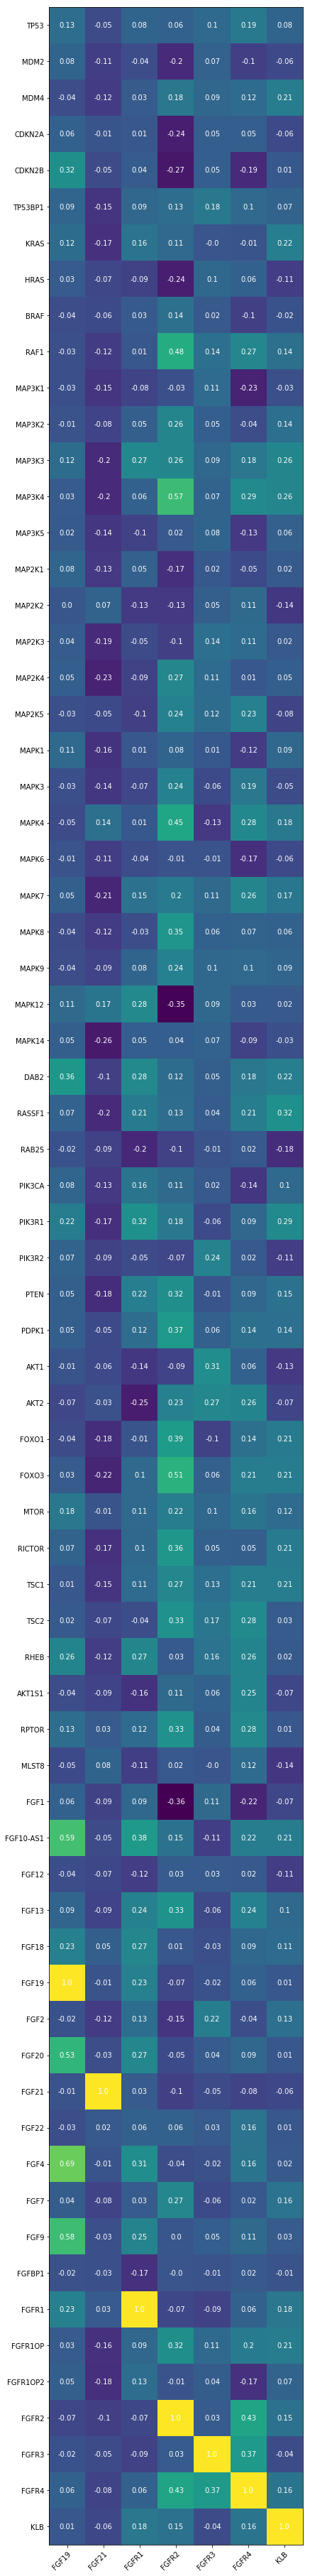

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 50.5)
im = ax.imshow(correlation_coef)

ax.set_xticks(np.arange(correlation_coef.shape[1]))
ax.set_yticks(np.arange(correlation_coef.shape[0]))
ax.set_xticklabels(correlation_coef.columns.tolist())
ax.set_yticklabels(correlation_coef.index.tolist())

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(correlation_coef.shape[0]):
    for j in range(correlation_coef.shape[1]):
        text = ax.text(j, i, np.round(correlation_coef.iloc[i, j], 2),
                       ha="center", va="center", color="w")

fig.tight_layout()
plt.show()

(70, 7)